## 실제 실무에서 쓰이는 코드들

In [20]:
import tensorflow as tf
tf.set_random_seed(777)
xdata=[[1,2],
       [2,3],
       [3,1],
       [4,3],
       [5,3],
       [6,2]]
ydata=[[0],
      [0],
      [0],
      [1],
      [1],
      [1]]
x=tf.placeholder(tf.float32, shape=[None,2])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))
hf= tf.sigmoid(tf.matmul(x,w)+b)
#reduce_mean?하나의 값이 아닌 전체 데이터에 대한 cost 평균을 구하기 위해
cost=-tf.reduce_mean(y* tf.log(hf) + (1-y)*tf.log(1-hf))
#optimizer대신 바로 train으로 가능
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
predicted= tf.cast(hf>0.5, dtype=tf.float32) #0또는 1로 캐스팅
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))
                                
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        _, cv=sess.run([train,cost], feed_dict={x:xdata, y:ydata})
#         if step%200==0:
#             print(step, cv)
    h,pv,av=sess.run([hf,predicted,accuracy], feed_dict={x:xdata, y:ydata})
    print("예측결과",h)
    print("w: ",sess.run(w))
    print("b: ",sess.run(b))
    print("예측값: ",pv)
    print("정확도: ",av)

예측결과 [[0.03140501]
 [0.1597384 ]
 [0.30803126]
 [0.7799405 ]
 [0.9386627 ]
 [0.9798631 ]]
w:  [[1.4627477 ]
 [0.30595565]]
b:  [-5.503538]
예측값:  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
정확도:  1.0


## 당뇨 판정 모델 (binary classification)

In [49]:
import numpy as np
xy=np.loadtxt('data/data-03-diabetes.csv',
           delimiter=",",dtype=np.float32)

xdata=xy[:,0:-1]
ydata=xy[:,[-1]]
print(ydata.shape)
x=tf.placeholder(tf.float32, shape=[None,8])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([8,1]))
b=tf.Variable(tf.random_normal([1]))



################################### matmul()????왜 인수 자리가 바뀌면 안되나
hf=tf.sigmoid(tf.matmul(x,w)+b)




cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)
predicted=tf.cast(hf>0.5,dtype=tf.float32) #임계치에 대한 근거가 필요(domain 지식유용)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y),dtype=tf.float32))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
#         cv,_=sess.run([cost, train], feed_dict={x:xdata,y:ydata})
#         if step % 200==0:
#             print(step, cv)
#     hv, pv, av=sess.run([hf, predicted, accuracy], feed_dict={x:xdata,y:ydata})
#     print("hf:", hv, "\npv:",pv, "\nav:",av)
        cv,_=sess.run([cost, train], feed_dict={x:xdata, y:ydata})
        if step %200==0:
            print(step,cv)
    hv,pv,av=sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    print("hf:",hv, "\npv: ",pv,"\nav: ",av)
            

(759, 1)
0 1.0027235
200 0.79246014
400 0.74342024
600 0.7191128
800 0.69999474
1000 0.6829654
1200 0.6674211
1400 0.65317434
1600 0.64011115
1800 0.62813485
2000 0.6171558
2200 0.6070902
2400 0.5978596
2600 0.5893917
2800 0.58161914
3000 0.57447994
3200 0.56791747
3400 0.5618797
3600 0.5563195
3800 0.5511936
4000 0.54646313
4200 0.54209256
4400 0.5380502
4600 0.53430676
4800 0.5308363
5000 0.52761513
5200 0.5246219
5400 0.5218373
5600 0.51924396
5800 0.51682585
6000 0.5145689
6200 0.51246
6400 0.51048744
6600 0.50864047
6800 0.5069094
7000 0.5052854
7200 0.5037603
7400 0.5023269
7600 0.50097847
7800 0.49970868
8000 0.498512
8200 0.49738333
8400 0.49631786
8600 0.49531132
8800 0.49435958
9000 0.4934592
9200 0.4926065
9400 0.49179858
9600 0.49103245
9800 0.49030545
10000 0.48961517
hf: [[0.41834942]
 [0.91760033]
 [0.17131346]
 [0.94333136]
 [0.1932122 ]
 [0.7233992 ]
 [0.9349479 ]
 [0.5648508 ]
 [0.26799807]
 [0.5467066 ]
 [0.7399874 ]
 [0.17340717]
 [0.23150271]
 [0.29079986]
 [0.7105

## Knn

꽃잎과 꽃받침에 대한 data들어왔을 때 분류를 하고싶다
Multilabel classification ->softmax 또는
Knn(k개의 가까운 이웃들에 의해 결정(유클리드안 거리))
지금은 Knn case

[1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2
 0]


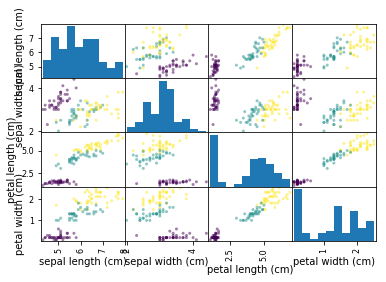

In [69]:
from sklearn.datasets import load_iris #sci-kit learn
from sklearn.model_selection import train_test_split #자동으로 분리해주는 함수
import pandas as pd
import matplotlib.pyplot as plt

iris_dataset=load_iris()
# print("keys: \n{}".format(iris_dataset.keys()))
# print("target names:{}".format(iris_dataset['target_names']))
# print("feature names:{}".format(iris_dataset['feature_names']))
# print("data 크기:{}".format(iris_dataset['data'].shape))
# print(iris_dataset['data'])
# print("Y(실제값):{}".format(iris_dataset['target']))


"""
동일한 데이터셋이 분리되고 random_state에 의해 무작위로 뒤섞임
동일한 것을 뽑는 이유? 객관적인 테스트를 위해 
train입력데이터-레이블
test입력데이터-레이블
"""
x_train,x_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0) 
print(y_train) #무작위로 섞였음을 확인
# print(x_test.shape)

iris_dataframe=pd.DataFrame(x_train, columns=iris_dataset.feature_names)
iris_dataframe.head()
#산점도 행렬 c로 색상구분!
pd.plotting.scatter_matrix(iris_dataframe, c=y_train) 
plt.show()




In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5) #k적정값은 elbow그래프로.
knn.fit(x_train, y_train)
x_new=np.array([[5,2.9,1,0.2]])
prediction=knn.predict(x_new)
print(prediction)
print(iris_dataset['target_names'][prediction])

[0]
['setosa']


In [78]:
y_pred=knn.predict(x_test)
print("테스트 데이터 예측 결과:\n{}".format(y_pred))
#y_test(정답)과 비교
print("정확도:{:.2f}".format(np.mean(y_pred==y_test))) #{:.2f} ->들어가는 값이 소수2둘째자리까지

테스트 데이터 예측 결과:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
정확도:0.97
